In [1]:
import sklearn
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_iris()

In [3]:
df = pd.DataFrame(data=np.c_[data.data, data.target], columns=data.feature_names + ['target'])

In [4]:
df['name'] = df.target.apply(lambda x: data.target_names[int(x)] )

In [5]:
df.head(60)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


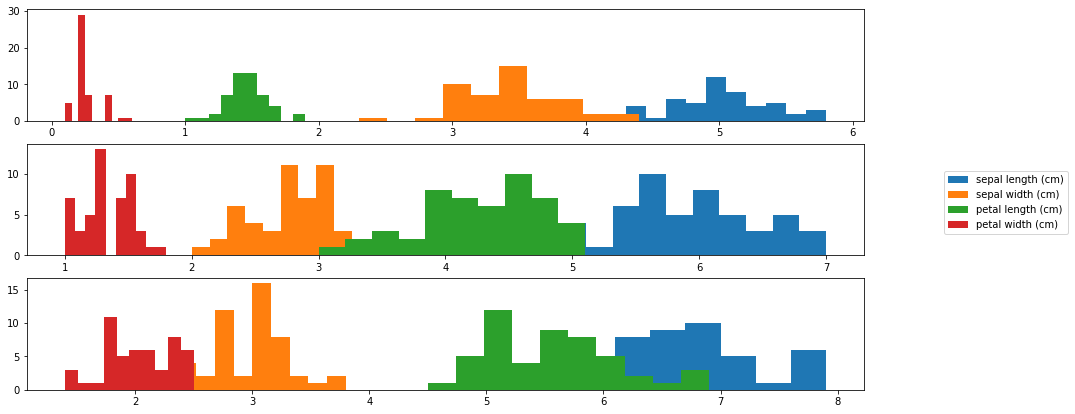

In [6]:
arrgs = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
fig, ax = plt.subplots(3, 1, figsize=(15, 7))

for i in range(3):
    ax[i].hist(df[df['target'] == i][arrgs[0]])
    ax[i].hist(df[df['target'] == i][arrgs[1]])
    ax[i].hist(df[df['target'] == i][arrgs[2]])
    ax[i].hist(df[df['target'] == i][arrgs[3]])
    
plt.legend(arrgs, bbox_to_anchor=(1.25, 2.))

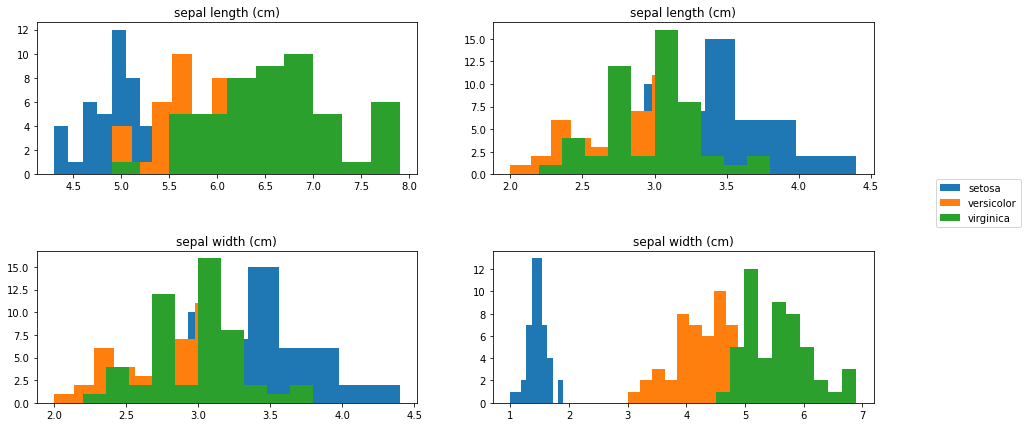

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

for i in range(2):
    for j in range(2):
        ax[i, j].set_title(arrgs[i])
        ax[i, j].hist(df[df['target'] == 0][arrgs[i + j]])
        ax[i, j].hist(df[df['target'] == 1][arrgs[i + j]])
        ax[i, j].hist(df[df['target'] == 2][arrgs[i + j]])

plt.legend(df.name.unique(), bbox_to_anchor=(1.4, 1.5))
plt.subplots_adjust(hspace=.5)

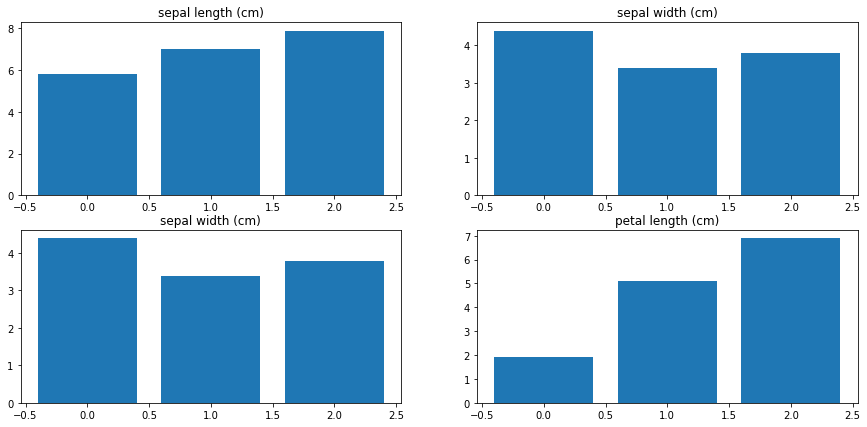

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

for i in range(2):
    for j in range(2):
        ax[i, j].bar(df['target'], df[arrgs[i + j]])
        ax[i, j].set_title(arrgs[i + j])

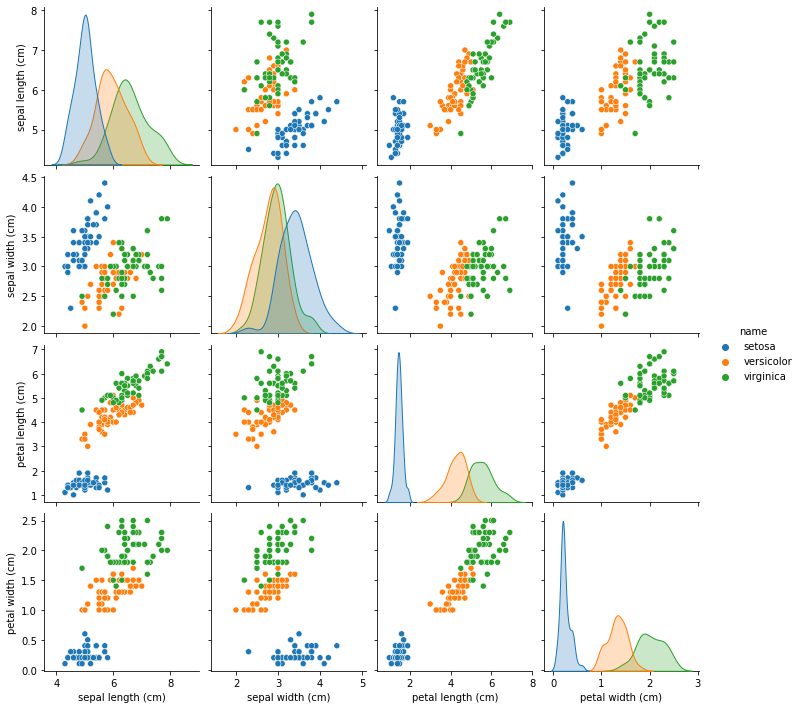

In [9]:
sns.pairplot(df.loc[:, df.columns != 'target'], hue='name')

In [10]:
df.loc[:, :'petal width (cm)'].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [11]:
plt.close('all')

### Самые большие зависимости
#### sepal length (cm) и petal length (cm): 0.871754
#### sepal length (cm) и petal width (cm): 0.817941
#### petal width (cm) и petal length (cm): 0.962865

In [12]:
from sklearn.model_selection import train_test_split  # [['sepal length (cm)', 'petal width (cm)', 'petal length (cm)']]

x_fit, x_test, y_fit, y_test = train_test_split(df[['petal width (cm)', 'petal length (cm)']], df['target'], test_size=.3)

### Встроенный GaussianNB

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
history = model.fit(x_fit, y_fit)

In [14]:
y_predict = model.predict(x_test)

In [15]:
mask = y_predict == y_test.values
len(mask[mask == True]) / float(len(mask))

0.9333333333333333

### Встроенный LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
history = model.fit(x_fit, y_fit)

In [17]:
y_predict = model.predict(x_test)

In [18]:
mask = np.around(y_predict) == y_test.values
len(mask[mask == True]) / float(len(mask))

0.9333333333333333

### Встроенный KMeans

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(x_fit)

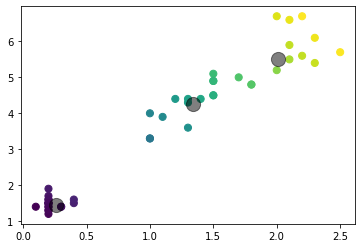

In [20]:
plt.scatter(x_test['petal width (cm)'], x_test['petal length (cm)'], c=y_predict, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=.5)

In [21]:
y_predict = kmeans.predict(x_test)

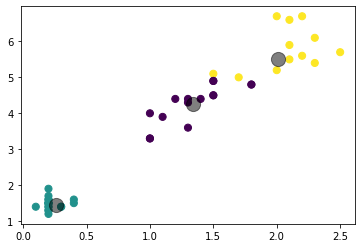

In [22]:
plt.scatter(x_test['petal width (cm)'], x_test['petal length (cm)'], c=y_predict, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=.5)

### Свой KMeans

In [23]:
from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X, n_clusters):
    i = np.random.permutation(X.shape[0])[:n_clusters]
    centers = X.iloc[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean() for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

In [24]:
center, label = find_clusters(x_fit, 3)

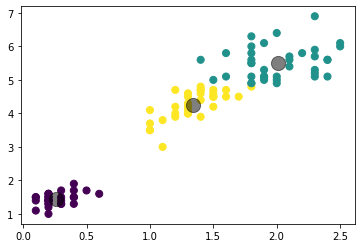

In [38]:
plt.scatter(x_fit['petal width (cm)'], x_fit['petal length (cm)'], c=label, s=50, cmap='viridis')
plt.scatter(center[:, 0], center[:, 1], c='black', s=200, alpha=.5)

In [39]:
plt.close('all')

In [40]:
from sklearn.metrics import confusion_matrix

x_test = x_test.astype('int')
y_test = y_test.astype('int')
cm = confusion_matrix(y_test, y_predict, labels=[1, 2, 3])

<AxesSubplot:>

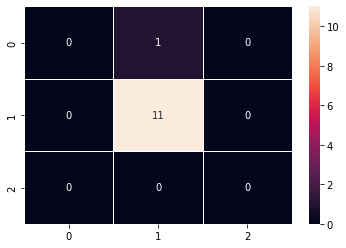

In [41]:
sns.heatmap(cm, annot=True, linewidths=1)

In [42]:
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp, fn, tp)

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))
metrics.accuracy_score(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        15
           2       0.92      0.92      0.92        12

    accuracy                           0.24        45
   macro avg       0.31      0.31      0.31        45
weighted avg       0.24      0.24      0.24        45



0.24444444444444444

In [46]:
from sklearn.model_selection import cross_validate
train_data, test_data, train_labels, test_labels = train_test_split(df[['sepal length (cm)', 'sepal width (cm)', 
                                                                       'petal length (cm)','petal width (cm)']],
                                                                        df['target'], test_size=0.3, random_state=0)


In [47]:
from scipy import polyval, stats
fit_output = stats.linregress(df[['petal length (cm)', 'petal width (cm)']])
slope, intercept, r_value, p_value, sope_stat_error = fit_output
print(r_value)

0.962865431402796


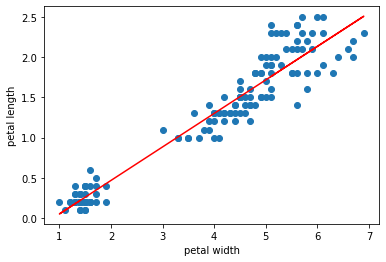

In [48]:
plt.plot(df['petal length (cm)'], df['petal width (cm)'], 'o')
plt.plot(df['petal length (cm)'], intercept+slope*df['petal length (cm)'], 'r')
plt.ylabel('petal length')
plt.xlabel('petal width')
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
reg = model.fit(x_fit, y_fit)
reg.score(x_fit, y_fit)
y_predict = model.predict(x_test)

### Свой CMeans

In [50]:
from sklearn.metrics import pairwise_distances


def find_clusters(X, n_clusters):
    i = np.random.permutation(X.shape[0])[:n_clusters]
    centers = X.iloc[i]
    
    while True:
        ses = pairwise_distances(X, centers)
        s_all = ses.sum(axis=1)
        k = 1 / s_all
        nu = (1 - ses * k[:, np.newaxis]) / 2
        
        new_centers = np.array([X[np.argmax(nu, axis=1) == i].mean() for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, nu

In [51]:
centers, nu = find_clusters(x_fit, 3)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

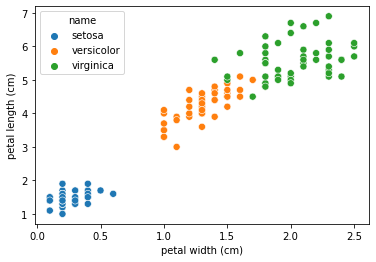

In [52]:
sns.scatterplot(df['petal width (cm)'], df['petal length (cm)'], hue=df['name'],s=50, cmap='viridis')

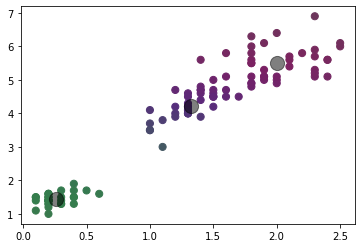

In [53]:
plt.scatter(x_fit['petal width (cm)'], x_fit['petal length (cm)'], c=nu, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=.5)

In [54]:
plt.close('all')